# Data Formatting
County level data will be used to model tornado counts in Wisconsin counties based on climate data

In [1]:
import pandas as pd

In [2]:
climate_data = pd.read_csv('data/county_climate.csv')
tornado_data = pd.read_csv('data/tnd_wis_county.csv')

In [3]:
tornado_data[tornado_data['start_county'] == 'Saint Croix County'].head()

,Unnamed: 0,yr,mo,dy,st,start_municipality,end_municipality,start_county,end_county,len,mag,inj,fat,slat,slon,count
27,1662,1954,8,15,WI,Town of Richmond,NaN,Saint Croix County,Saint Croix County,3.0,2,0,0,45.12,-92.58,1
55,3723,1958,10,9,WI,NaN,NaN,Saint Croix County,Saint Croix County,0.1,2,0,0,45.02,-92.73,1
61,4038,1958,6,22,WI,NaN,NaN,Saint Croix County,NaN,0.1,0,0,0,45.05,-92.75,1
63,4074,1958,6,4,WI,Town of Eau Galle,Town of Grant,Saint Croix County,Dunn County,33.7,5,74,21,44.90,-92.33,1
118,6233,1961,9,2,WI,NaN,Town of New Haven,Saint Croix County,Dunn County,5.4,1,0,0,45.07,-92.17,1


In [4]:
climate_data[climate_data['County'] == 'St. Croix County'].head()

,Unnamed: 0,County,Date,AvgTmp,Year,Month,MaxTmp,MinTmp,Precip
46860,46860,St. Croix County,195001,5.6,1950,1,17.9,-6.6,1.91
46861,46861,St. Croix County,195002,12.5,1950,2,24.7,0.3,0.83
46862,46862,St. Croix County,195003,21.1,1950,3,29.9,12.3,2.62
46863,46863,St. Croix County,195004,35.5,1950,4,44.5,26.5,2.59
46864,46864,St. Croix County,195005,54.1,1950,5,64.9,43.3,2.64


Saint Croix is written differently between data sets.

In [5]:
climate_data.loc[climate_data.County == 'St. Croix County', 'County'] = 'Saint Croix County'

In [6]:
climate_data[climate_data['County'] == 'Saint Croix County'].head()

,Unnamed: 0,County,Date,AvgTmp,Year,Month,MaxTmp,MinTmp,Precip
46860,46860,Saint Croix County,195001,5.6,1950,1,17.9,-6.6,1.91
46861,46861,Saint Croix County,195002,12.5,1950,2,24.7,0.3,0.83
46862,46862,Saint Croix County,195003,21.1,1950,3,29.9,12.3,2.62
46863,46863,Saint Croix County,195004,35.5,1950,4,44.5,26.5,2.59
46864,46864,Saint Croix County,195005,54.1,1950,5,64.9,43.3,2.64


In [7]:
tornado_data.nunique()['start_county']

79

There are only 72 counties in Wisconsin, the tornado data is accounting for tornadoes that started in other states and moved into Wisconsin. We are only interested in tornadoes that started in Wisconsin so data for those counties will be removed.

In [13]:
tornado_data = tornado_data[(tornado_data['start_county'] != 'Allamakee County') & (tornado_data['start_county'] != 'Chisago County') & (tornado_data['start_county'] != 'Clayton County') & (tornado_data['start_county'] != 'Dickinson County') & (tornado_data['start_county'] != 'Jo Daviess County') & (tornado_data['start_county'] != 'Lake County') & (tornado_data['start_county'] != 'Stephenson County') & (tornado_data['start_county'] != 'Wabasha County')]

In [14]:
tornado_data.nunique()['start_county']

71

In [15]:
tornado_data[tornado_data['start_county'] == 'Menominee County']

,Unnamed: 0,yr,mo,dy,st,start_municipality,end_municipality,start_county,end_county,len,mag,inj,fat,slat,slon,count


Menomonee County was created in 1959, after our data set begins. It was formed from Shawano and Oconto counties. Since those counties should capture that data, Menominee County will not be used when we get to the modeling stage

In [31]:
climate_data[climate_data['County'] == 'Menominee County']

,Unnamed: 0,County,Date,AvgTmp,Year,Month,MaxTmp,MinTmp,Precip
33228,33228,Menominee County,195001,10.2,1950,1,21.5,-1.0,3.09
33229,33229,Menominee County,195002,14.6,1950,2,25.3,3.8,0.83
33230,33230,Menominee County,195003,21.7,1950,3,32.0,11.3,2.73
33231,33231,Menominee County,195004,32.4,1950,4,42.0,22.9,3.32
33232,33232,Menominee County,195005,52.2,1950,5,66.8,37.7,3.05
...,...,...,...,...,...,...,...,...,...
34075,34075,Menominee County,202008,67.8,2020,8,79.5,56.1,2.60
34076,34076,Menominee County,202009,56.6,2020,9,66.6,46.5,3.00
34077,34077,Menominee County,202010,40.9,2020,10,49.9,32.0,3.04
34078,34078,Menominee County,202011,38.2,2020,11,48.1,28.3,2.53


In [32]:
climate_data.head()

,Unnamed: 0,County,Date,AvgTmp,Year,Month,MaxTmp,MinTmp,Precip
0,0,Adams County,195001,14.0,1950,1,26.0,2.0,1.81
1,1,Adams County,195002,15.8,1950,2,26.5,5.2,1.07
2,2,Adams County,195003,23.2,1950,3,32.7,13.7,1.85
3,3,Adams County,195004,36.2,1950,4,46.3,26.0,3.09
4,4,Adams County,195005,55.1,1950,5,68.4,41.7,2.38


In [33]:
winter_climate_data = climate_data[climate_data['Month'] < 4]

In [34]:
winter_climate_data.head()

,Unnamed: 0,County,Date,AvgTmp,Year,Month,MaxTmp,MinTmp,Precip
0,0,Adams County,195001,14.0,1950,1,26.0,2.0,1.81
1,1,Adams County,195002,15.8,1950,2,26.5,5.2,1.07
2,2,Adams County,195003,23.2,1950,3,32.7,13.7,1.85
12,12,Adams County,195101,9.6,1951,1,20.4,-1.2,1.06
13,13,Adams County,195102,16.2,1951,2,26.6,5.8,1.55


In [35]:
group = winter_climate_data.groupby(['Year', 'County'])
winter_yearly = group.mean()[['AvgTmp', 'MaxTmp', 'MinTmp', 'Precip']]
winter_yearly.rename(columns={'Precip': 'AvgPrecip', 'MaxTmp': 'AvgMaxTmp', 'MinTmp': 'AvgMinTmp'}, inplace=True)
winter_yearly['TotPrecip'] = group.sum()['Precip']
winter_yearly['MaxTmp'] = group.max()['MaxTmp']
winter_yearly['MinTmp'] = group.min()['MinTmp']
winter_yearly

AvgTmp  AvgMaxTmp  AvgMinTmp  AvgPrecip  TotPrecip  \
Year County                                                                    
1950 Adams County      17.666667  28.400000   6.966667   1.576667       4.73   
     Ashland County    11.333333  23.033333  -0.366667   1.650000       4.95   
     Barron County     12.133333  22.766667   1.466667   1.870000       5.61   
     Bayfield County   11.066667  23.066667  -0.933333   1.800000       5.40   
     Brown County      18.900000  27.966667   9.833333   2.156667       6.47   
...                          ...        ...        ...        ...        ...   
2020 Waukesha County   29.400000  37.133333  21.600000   2.180000       6.54   
     Waupaca County    26.833333  35.300000  18.300000   2.030000       6.09   
     Waushara County   26.733333  35.300000  18.166667   1.930000       5.79   
     Winnebago County  27.500000  35.300000  19.700000   2.123333       6.37   
     Wood County       24.933333  34.300000  15.533333   1.903333       5.71   

                       MaxTmp  MinTmp  
Year County                            
1950 Adams County        32.7     2.0  
     Ashland County      29.0    -7.0  
     Barron County       28.4    -7.5  
     Bayfield County     29.5    -9.1  
     Brown County        32.0     5.5  
...                       ...     ...  
2020 Waukesha County     45.6    15.5  
     Waupaca County      43.8    10.8  
     Waushara County     43.9    10.6  
     Winnebago County    43.5    12.4  
     Wood County         43.5     7.0  

[5112 rows x 7 columns]

In [36]:
winter_yearly.head()

AvgTmp  AvgMaxTmp  AvgMinTmp  AvgPrecip  TotPrecip  \
Year County                                                                   
1950 Adams County     17.666667  28.400000   6.966667   1.576667       4.73   
     Ashland County   11.333333  23.033333  -0.366667   1.650000       4.95   
     Barron County    12.133333  22.766667   1.466667   1.870000       5.61   
     Bayfield County  11.066667  23.066667  -0.933333   1.800000       5.40   
     Brown County     18.900000  27.966667   9.833333   2.156667       6.47   

                      MaxTmp  MinTmp  
Year County                           
1950 Adams County       32.7     2.0  
     Ashland County     29.0    -7.0  
     Barron County      28.4    -7.5  
     Bayfield County    29.5    -9.1  
     Brown County       32.0     5.5

In [37]:
tornado_data.head()

,Unnamed: 0,Year,mo,dy,st,start_municipality,end_municipality,County,end_county,len,mag,inj,fat,slat,slon,count
0,151,1950,6,25,WI,Town of Grow,NaN,Rusk County,NaN,0.5,1,0,0,45.42,-91.00,1
1,152,1950,6,25,WI,Town of Hackett,Town of Knox,Price County,Price County,8.4,2,0,0,45.57,-90.30,1
2,153,1950,6,25,WI,Town of Unity,Town of Holton,Clark County,Marathon County,7.8,2,0,1,44.83,-90.35,1
3,154,1950,6,25,WI,Town of Woodboro,Town of Pine Lake,Oneida County,Oneida County,13.1,4,12,2,45.58,-89.58,1
4,156,1950,6,25,WI,Town of Berlin,NaN,Green Lake County,Green Lake County,0.1,3,0,0,43.95,-88.95,1


In [38]:
tornado_data.rename(columns = {'yr': 'Year', 'start_county': 'County'}, inplace=True)
group = tornado_data[pd.notna(tornado_data['County'])].groupby(['Year', 'County'])
tornado_yearly = group.sum()[['mag', 'fat', 'inj', 'count']]
tornado_yearly['mag'] = tornado_yearly['mag'] / tornado_yearly['count']
tornado_yearly.columns = ['AvgMag', 'Fat', 'Inj', 'Count']
tornado_yearly['MaxMag'] = group['mag'].max()
tornado_yearly.head()

AvgMag  Fat  Inj  Count  MaxMag
Year County                                            
1950 Clark County          2.0    1    0      1       2
     Green Lake County     3.0    0    0      1       3
     Oneida County         4.0    2   12      1       4
     Price County          2.0    0    0      1       2
     Rusk County           1.0    0    0      1       1

In [39]:
result = pd.merge(winter_yearly, tornado_yearly, on=['County', 'Year'])

In [40]:
tnd_winter_combined = result.groupby(['Year', 'County']).sum()

In [41]:
tnd_winter_combined

AvgTmp  AvgMaxTmp  AvgMinTmp  AvgPrecip  \
Year County                                                           
1950 Clark County        13.600000  24.833333   2.333333   1.526667   
     Green Lake County   20.633333  30.000000  11.233333   1.966667   
     Oneida County       12.533333  24.266667   0.766667   2.030000   
     Price County        12.100000  23.366667   0.800000   2.050000   
     Rusk County         12.633333  23.433333   1.866667   1.720000   
...                            ...        ...        ...        ...   
2020 Trempealeau County  25.766667  34.533333  17.033333   1.586667   
     Vilas County        20.066667  29.900000  10.166667   1.460000   
     Walworth County     30.166667  37.600000  22.766667   2.196667   
     Washington County   27.666667  35.600000  19.733333   1.960000   
     Winnebago County    27.500000  35.300000  19.700000   2.123333   

                         TotPrecip  MaxTmp  MinTmp  AvgMag  Fat  Inj  Count  \
Year County                                                                   
1950 Clark County             4.58    30.2    -4.9     2.0    1    0      1   
     Green Lake County        5.90    33.6     7.2     3.0    0    0      1   
     Oneida County            6.09    29.5    -5.8     4.0    2   12      1   
     Price County             6.15    28.9    -5.8     2.0    0    0      1   
     Rusk County              5.16    28.3    -5.8     1.0    0    0      1   
...                            ...     ...     ...     ...  ...  ...    ...   
2020 Trempealeau County       4.76    44.5     8.6     1.0    0    0      1   
     Vilas County             4.38    38.3     1.2     1.0    0    0      2   
     Walworth County          6.59    46.6    17.2     0.0    0    0      1   
     Washington County        5.88    44.2    13.2     0.0    0    0      1   
     Winnebago County         6.37    43.5    12.4     0.0    0    0      3   

                         MaxMag  
Year County                      
1950 Clark County             2  
     Green Lake County        3  
     Oneida County            4  
     Price County             2  
     Rusk County              1  
...                         ...  
2020 Trempealeau County       1  
     Vilas County             1  
     Walworth County          0  
     Washington County        0  
     Winnebago County         0  

[1001 rows x 12 columns]

We now have a final table that contains the average winter temperature, average maximum winter temperature, average minimum winter temperature, average winter precipitation, the average magnitude of tornadoes, the total fatalities from tornadoes, the total injuries from tornadoes, and the total number of tornadoes for each county in each given year from 1950-2020.

In [42]:
tnd_winter_combined.to_csv('data/tnd_winter_combined')

In [43]:
tnd_winter_combined.corr()

,AvgTmp,AvgMaxTmp,AvgMinTmp,AvgPrecip,TotPrecip,MaxTmp,MinTmp,AvgMag,Fat,Inj,Count,MaxMag
AvgTmp,1.000000,0.977861,0.988273,0.114900,0.114900,0.625853,0.863725,-0.174340,-0.034575,0.023030,0.017308,-0.170927
AvgMaxTmp,0.977861,1.000000,0.934483,0.049499,0.049499,0.685752,0.802960,-0.166860,-0.035845,0.015548,0.006757,-0.167206
AvgMinTmp,0.988273,0.934483,1.000000,0.159272,0.159272,0.564429,0.884267,-0.174684,-0.032622,0.027764,0.024880,-0.168500
AvgPrecip,0.114900,0.049499,0.159272,1.000000,1.000000,-0.034852,0.098897,-0.094434,-0.075593,-0.056325,0.016283,-0.094435
TotPrecip,0.114900,0.049499,0.159272,1.000000,1.000000,-0.034852,0.098897,-0.094434,-0.075593,-0.056325,0.016283,-0.094435
MaxTmp,0.625853,0.685752,0.564429,-0.034852,-0.034852,1.000000,0.277897,-0.146702,-0.042728,-0.009357,-0.002781,-0.148762
MinTmp,0.863725,0.802960,0.884267,0.098897,0.098897,0.277897,1.000000,-0.168495,-0.037880,0.017140,0.048845,-0.157265
AvgMag,-0.174340,-0.166860,-0.174684,-0.094434,-0.094434,-0.146702,-0.168495,1.000000,0.247921,0.305183,-0.088630,0.947082
Fat,-0.034575,-0.035845,-0.032622,-0.075593,-0.075593,-0.042728,-0.037880,0.247921,1.000000,0.565259,0.035374,0.306368
Inj,0.023030,0.015548,0.027764,-0.056325,-0.056325,-0.009357,0.017140,0.305183,0.565259,1.000000,0.018396,0.321652


In [44]:
county_totals = tornado_data.groupby('County').sum()
county_totals['AvgCount'] = county_totals['count'] / 71
hot_counties = county_totals[county_totals['AvgCount'] > 0.25]
hot_counties = list(hot_counties.index)
hot_counties

['Adams County',
 'Barron County',
 'Brown County',
 'Calumet County',
 'Chippewa County',
 'Clark County',
 'Columbia County',
 'Dane County',
 'Dodge County',
 'Eau Claire County',
 'Fond du Lac County',
 'Grant County',
 'Green County',
 'Green Lake County',
 'Iowa County',
 'Jefferson County',
 'Juneau County',
 'Lafayette County',
 'Lincoln County',
 'Manitowoc County',
 'Marathon County',
 'Marinette County',
 'Marquette County',
 'Monroe County',
 'Oneida County',
 'Outagamie County',
 'Pierce County',
 'Polk County',
 'Portage County',
 'Price County',
 'Racine County',
 'Rock County',
 'Saint Croix County',
 'Sauk County',
 'Shawano County',
 'Vernon County',
 'Walworth County',
 'Waukesha County',
 'Waupaca County',
 'Waushara County',
 'Winnebago County']

Counties that have more than one tornado every four years on average

In [45]:
hot_tnd_wint = tnd_winter_combined.loc[(slice(None), hot_counties), :]
hot_tnd_wint

AvgTmp  AvgMaxTmp  AvgMinTmp  AvgPrecip  TotPrecip  \
Year County                                                                     
1950 Clark County       13.600000  24.833333   2.333333   1.526667       4.58   
     Green Lake County  20.633333  30.000000  11.233333   1.966667       5.90   
     Oneida County      12.533333  24.266667   0.766667   2.030000       6.09   
     Price County       12.100000  23.366667   0.800000   2.050000       6.15   
1951 Columbia County    18.566667  28.166667   9.000000   2.303333       6.91   
...                           ...        ...        ...        ...        ...   
2020 Chippewa County    23.466667  33.033333  13.900000   1.153333       3.46   
     Grant County       28.500000  36.500000  20.533333   2.040000       6.12   
     Polk County        23.233333  32.633333  13.866667   1.076667       3.23   
     Walworth County    30.166667  37.600000  22.766667   2.196667       6.59   
     Winnebago County   27.500000  35.300000  19.700000   2.123333       6.37   

                        MaxTmp  MinTmp  AvgMag  Fat  Inj  Count  MaxMag  
Year County                                                              
1950 Clark County         30.2    -4.9     2.0    1    0      1       2  
     Green Lake County    33.6     7.2     3.0    0    0      1       3  
     Oneida County        29.5    -5.8     4.0    2   12      1       4  
     Price County         28.9    -5.8     2.0    0    0      1       2  
1951 Columbia County      34.4     1.3     4.0    1    9      1       4  
...                        ...     ...     ...  ...  ...    ...     ...  
2020 Chippewa County      42.6     5.0     0.0    0    0      2       0  
     Grant County         46.2    13.6     0.5    0    0      2       1  
     Polk County          42.4     6.2     0.0    0    0      1       0  
     Walworth County      46.6    17.2     0.0    0    0      1       0  
     Winnebago County     43.5    12.4     0.0    0    0      3       0  

[749 rows x 12 columns]

Tornado data for counties that have one tornado begin there every four years on average

In [46]:
hot_tnd_wint.corr()

,AvgTmp,AvgMaxTmp,AvgMinTmp,AvgPrecip,TotPrecip,MaxTmp,MinTmp,AvgMag,Fat,Inj,Count,MaxMag
AvgTmp,1.000000,0.978158,0.987849,0.104604,0.104604,0.616460,0.852015,-0.178403,-0.051417,-0.011692,0.001920,-0.183872
AvgMaxTmp,0.978158,1.000000,0.934011,0.041912,0.041912,0.677146,0.787985,-0.169884,-0.052987,-0.015722,-0.008841,-0.179963
AvgMinTmp,0.987849,0.934011,1.000000,0.148378,0.148378,0.553224,0.875973,-0.179477,-0.048694,-0.008387,0.010295,-0.181183
AvgPrecip,0.104604,0.041912,0.148378,1.000000,1.000000,-0.024826,0.095020,-0.115443,-0.089084,-0.061638,-0.006608,-0.121203
TotPrecip,0.104604,0.041912,0.148378,1.000000,1.000000,-0.024826,0.095020,-0.115443,-0.089084,-0.061638,-0.006608,-0.121203
MaxTmp,0.616460,0.677146,0.553224,-0.024826,-0.024826,1.000000,0.249169,-0.131081,-0.058430,-0.022368,-0.019400,-0.139441
MinTmp,0.852015,0.787985,0.875973,0.095020,0.095020,0.249169,1.000000,-0.195293,-0.052520,-0.025984,0.047963,-0.188636
AvgMag,-0.178403,-0.169884,-0.179477,-0.115443,-0.115443,-0.131081,-0.195293,1.000000,0.268179,0.349729,-0.104137,0.940441
Fat,-0.051417,-0.052987,-0.048694,-0.089084,-0.089084,-0.058430,-0.052520,0.268179,1.000000,0.659358,0.026651,0.327782
Inj,-0.011692,-0.015722,-0.008387,-0.061638,-0.061638,-0.022368,-0.025984,0.349729,0.659358,1.000000,0.026266,0.371970


Not finding a great indicator for number of tornadoes starting in a county. There seems to be a loose, negative correlation between magnitude and the climate data, particularly minimum temperature.

In [47]:
import seaborn as sns

<AxesSubplot:xlabel='MinTmp', ylabel='AvgMag'>

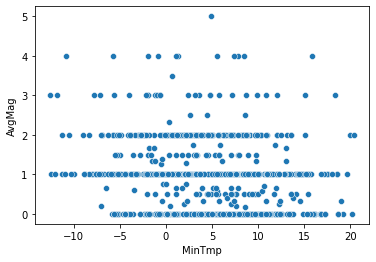

In [48]:
sns.scatterplot(x=hot_tnd_wint['MinTmp'], y=hot_tnd_wint[hot_tnd_wint['AvgMag'] >= 0]['AvgMag'])

This really does not tell us much. Magnitude is really categorical data making this difficult to plot

In [49]:
hotter_counties = county_totals[county_totals['AvgCount'] > 0.5]
hotter_counties = list(hotter_counties.index)
hotter_counties

['Dane County',
 'Dodge County',
 'Fond du Lac County',
 'Grant County',
 'Marathon County']

Counties where a tornado begins once every two years on average

In [50]:
hotter_tnd_wint = tnd_winter_combined.loc[(slice(None), hotter_counties), :]
hotter_tnd_wint

AvgTmp  AvgMaxTmp  AvgMinTmp  AvgPrecip  \
Year County                                                           
1951 Dodge County        19.600000  28.233333  10.966667   2.136667   
1954 Fond du Lac County  25.066667  33.700000  16.466667   0.933333   
     Grant County        27.100000  36.133333  18.100000   0.813333   
     Marathon County     20.066667  29.533333  10.633333   0.973333   
1955 Dane County         22.166667  31.466667  12.866667   1.013333   
...                            ...        ...        ...        ...   
2018 Dodge County        22.833333  31.700000  13.933333   1.496667   
     Fond du Lac County  23.300000  32.000000  14.633333   1.130000   
     Grant County        24.333333  33.766667  14.900000   1.296667   
2019 Marathon County     16.200000  26.033333   6.333333   2.273333   
2020 Grant County        28.500000  36.500000  20.533333   2.040000   

                         TotPrecip  MaxTmp  MinTmp  AvgMag  Fat  Inj  Count  \
Year County                                                                   
1951 Dodge County             6.41    34.6     3.4     2.0    0    0      1   
1954 Fond du Lac County       2.80    37.6     8.1     2.0    0    0      1   
     Grant County             2.44    41.4     8.5     1.0    0    0      1   
     Marathon County          2.92    35.2     1.0     2.0    0    0      1   
1955 Dane County              3.04    40.0     9.1     2.0    0    0      1   
...                            ...     ...     ...     ...  ...  ...    ...   
2018 Dodge County             4.49    41.3     8.9     1.5    0    0      2   
     Fond du Lac County       3.39    40.4    10.6     0.7    0    0     10   
     Grant County             3.89    44.1     9.3     0.0    0    0      2   
2019 Marathon County          6.82    36.0     2.4     1.0    0    0      1   
2020 Grant County             6.12    46.2    13.6     0.5    0    0      2   

                         MaxMag  
Year County                      
1951 Dodge County             2  
1954 Fond du Lac County       2  
     Grant County             1  
     Marathon County          2  
1955 Dane County              2  
...                         ...  
2018 Dodge County             2  
     Fond du Lac County       1  
     Grant County             0  
2019 Marathon County          1  
2020 Grant County             1  

[143 rows x 12 columns]

In [51]:
hotter_tnd_wint.corr()

,AvgTmp,AvgMaxTmp,AvgMinTmp,AvgPrecip,TotPrecip,MaxTmp,MinTmp,AvgMag,Fat,Inj,Count,MaxMag
AvgTmp,1.000000,0.980920,0.987877,0.198247,0.198247,0.629940,0.828706,-0.217524,0.032023,0.024249,-0.102376,-0.250122
AvgMaxTmp,0.980920,1.000000,0.938889,0.137667,0.137667,0.699849,0.766484,-0.196774,0.025378,-0.005817,-0.117491,-0.237172
AvgMinTmp,0.987877,0.938889,1.000000,0.239828,0.239828,0.556082,0.856698,-0.229080,0.035730,0.047700,-0.087010,-0.254176
AvgPrecip,0.198247,0.137667,0.239828,1.000000,1.000000,0.084265,0.139781,-0.046810,0.113575,0.069026,-0.038584,-0.062085
TotPrecip,0.198247,0.137667,0.239828,1.000000,1.000000,0.084265,0.139781,-0.046810,0.113575,0.069026,-0.038584,-0.062085
MaxTmp,0.629940,0.699849,0.556082,0.084265,0.084265,1.000000,0.233781,-0.060658,-0.005301,-0.030855,-0.073268,-0.124807
MinTmp,0.828706,0.766484,0.856698,0.139781,0.139781,0.233781,1.000000,-0.264650,0.030782,0.065776,-0.032316,-0.254643
AvgMag,-0.217524,-0.196774,-0.229080,-0.046810,-0.046810,-0.060658,-0.264650,1.000000,0.214339,0.441887,-0.153710,0.881080
Fat,0.032023,0.025378,0.035730,0.113575,0.113575,-0.005301,0.030782,0.214339,1.000000,0.348894,0.052176,0.248407
Inj,0.024249,-0.005817,0.047700,0.069026,0.069026,-0.030855,0.065776,0.441887,0.348894,1.000000,0.086877,0.517203


There are some slightly stronger, negative correlations between climate data and count with this subset, although they are still relatively weak. Temperature appears to be a little big stronger of an indicator for magnitude

<AxesSubplot:xlabel='MinTmp', ylabel='MaxMag'>

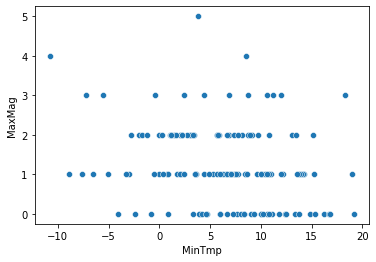

In [52]:
sns.scatterplot(data=hotter_tnd_wint, x='MinTmp', y='MaxMag')

<AxesSubplot:xlabel='AvgTmp', ylabel='Count'>

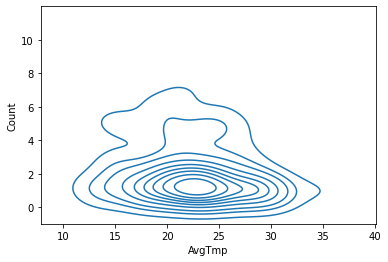

In [53]:
sns.kdeplot(data=hotter_tnd_wint, x='AvgTmp', y='Count')

Most of the data seems to be around an average temp of 22.5 degrees and one tornado. It may be better to predict if a tornado will occur or not rather than how many will occur

It would probably make sense to include all counties in which there were zero tornadoes as well

In [54]:
all_tnd_wint = pd.merge(winter_yearly, tornado_yearly, how='left', on=['Year', 'County'])
all_tnd_wint

AvgTmp  AvgMaxTmp  AvgMinTmp  AvgPrecip  TotPrecip  \
Year County                                                                    
1950 Adams County      17.666667  28.400000   6.966667   1.576667       4.73   
     Ashland County    11.333333  23.033333  -0.366667   1.650000       4.95   
     Barron County     12.133333  22.766667   1.466667   1.870000       5.61   
     Bayfield County   11.066667  23.066667  -0.933333   1.800000       5.40   
     Brown County      18.900000  27.966667   9.833333   2.156667       6.47   
...                          ...        ...        ...        ...        ...   
2020 Waukesha County   29.400000  37.133333  21.600000   2.180000       6.54   
     Waupaca County    26.833333  35.300000  18.300000   2.030000       6.09   
     Waushara County   26.733333  35.300000  18.166667   1.930000       5.79   
     Winnebago County  27.500000  35.300000  19.700000   2.123333       6.37   
     Wood County       24.933333  34.300000  15.533333   1.903333       5.71   

                       MaxTmp  MinTmp  AvgMag  Fat  Inj  Count  MaxMag  
Year County                                                             
1950 Adams County        32.7     2.0     NaN  NaN  NaN    NaN     NaN  
     Ashland County      29.0    -7.0     NaN  NaN  NaN    NaN     NaN  
     Barron County       28.4    -7.5     NaN  NaN  NaN    NaN     NaN  
     Bayfield County     29.5    -9.1     NaN  NaN  NaN    NaN     NaN  
     Brown County        32.0     5.5     NaN  NaN  NaN    NaN     NaN  
...                       ...     ...     ...  ...  ...    ...     ...  
2020 Waukesha County     45.6    15.5     NaN  NaN  NaN    NaN     NaN  
     Waupaca County      43.8    10.8     NaN  NaN  NaN    NaN     NaN  
     Waushara County     43.9    10.6     NaN  NaN  NaN    NaN     NaN  
     Winnebago County    43.5    12.4     0.0  0.0  0.0    3.0     0.0  
     Wood County         43.5     7.0     NaN  NaN  NaN    NaN     NaN  

[5112 rows x 12 columns]

In [55]:
all_tnd_wint['Count'] = all_tnd_wint['Count'].fillna(0)

In [56]:
all_tnd_wint.head()

AvgTmp  AvgMaxTmp  AvgMinTmp  AvgPrecip  TotPrecip  \
Year County                                                                   
1950 Adams County     17.666667  28.400000   6.966667   1.576667       4.73   
     Ashland County   11.333333  23.033333  -0.366667   1.650000       4.95   
     Barron County    12.133333  22.766667   1.466667   1.870000       5.61   
     Bayfield County  11.066667  23.066667  -0.933333   1.800000       5.40   
     Brown County     18.900000  27.966667   9.833333   2.156667       6.47   

                      MaxTmp  MinTmp  AvgMag  Fat  Inj  Count  MaxMag  
Year County                                                            
1950 Adams County       32.7     2.0     NaN  NaN  NaN    0.0     NaN  
     Ashland County     29.0    -7.0     NaN  NaN  NaN    0.0     NaN  
     Barron County      28.4    -7.5     NaN  NaN  NaN    0.0     NaN  
     Bayfield County    29.5    -9.1     NaN  NaN  NaN    0.0     NaN  
     Brown County       32.0     5.5     NaN  NaN  NaN    0.0     NaN

In [57]:
all_tnd_wint['TndOcc'] = 0
all_tnd_wint.loc[all_tnd_wint.Count > 0 , 'TndOcc'] = 1
all_tnd_wint

AvgTmp  AvgMaxTmp  AvgMinTmp  AvgPrecip  TotPrecip  \
Year County                                                                    
1950 Adams County      17.666667  28.400000   6.966667   1.576667       4.73   
     Ashland County    11.333333  23.033333  -0.366667   1.650000       4.95   
     Barron County     12.133333  22.766667   1.466667   1.870000       5.61   
     Bayfield County   11.066667  23.066667  -0.933333   1.800000       5.40   
     Brown County      18.900000  27.966667   9.833333   2.156667       6.47   
...                          ...        ...        ...        ...        ...   
2020 Waukesha County   29.400000  37.133333  21.600000   2.180000       6.54   
     Waupaca County    26.833333  35.300000  18.300000   2.030000       6.09   
     Waushara County   26.733333  35.300000  18.166667   1.930000       5.79   
     Winnebago County  27.500000  35.300000  19.700000   2.123333       6.37   
     Wood County       24.933333  34.300000  15.533333   1.903333       5.71   

                       MaxTmp  MinTmp  AvgMag  Fat  Inj  Count  MaxMag  TndOcc  
Year County                                                                     
1950 Adams County        32.7     2.0     NaN  NaN  NaN    0.0     NaN       0  
     Ashland County      29.0    -7.0     NaN  NaN  NaN    0.0     NaN       0  
     Barron County       28.4    -7.5     NaN  NaN  NaN    0.0     NaN       0  
     Bayfield County     29.5    -9.1     NaN  NaN  NaN    0.0     NaN       0  
     Brown County        32.0     5.5     NaN  NaN  NaN    0.0     NaN       0  
...                       ...     ...     ...  ...  ...    ...     ...     ...  
2020 Waukesha County     45.6    15.5     NaN  NaN  NaN    0.0     NaN       0  
     Waupaca County      43.8    10.8     NaN  NaN  NaN    0.0     NaN       0  
     Waushara County     43.9    10.6     NaN  NaN  NaN    0.0     NaN       0  
     Winnebago County    43.5    12.4     0.0  0.0  0.0    3.0     0.0       1  
     Wood County         43.5     7.0     NaN  NaN  NaN    0.0     NaN       0  

[5112 rows x 13 columns]

If a tornado occurred it is listed under TndOcc as 1, if not it is 0

In [58]:
all_hot_tnd_wint = all_tnd_wint.loc[(slice(None), hot_counties), :]
all_hot_tnd_wint

AvgTmp  AvgMaxTmp  AvgMinTmp  AvgPrecip  TotPrecip  \
Year County                                                                    
1950 Adams County      17.666667  28.400000   6.966667   1.576667       4.73   
     Barron County     12.133333  22.766667   1.466667   1.870000       5.61   
     Brown County      18.900000  27.966667   9.833333   2.156667       6.47   
     Calumet County    19.433333  28.400000  10.500000   1.856667       5.57   
     Chippewa County   13.433333  24.333333   2.500000   1.640000       4.92   
...                          ...        ...        ...        ...        ...   
2020 Walworth County   30.166667  37.600000  22.766667   2.196667       6.59   
     Waukesha County   29.400000  37.133333  21.600000   2.180000       6.54   
     Waupaca County    26.833333  35.300000  18.300000   2.030000       6.09   
     Waushara County   26.733333  35.300000  18.166667   1.930000       5.79   
     Winnebago County  27.500000  35.300000  19.700000   2.123333       6.37   

                       MaxTmp  MinTmp  AvgMag  Fat  Inj  Count  MaxMag  TndOcc  
Year County                                                                     
1950 Adams County        32.7     2.0     NaN  NaN  NaN    0.0     NaN       0  
     Barron County       28.4    -7.5     NaN  NaN  NaN    0.0     NaN       0  
     Brown County        32.0     5.5     NaN  NaN  NaN    0.0     NaN       0  
     Calumet County      32.1     6.2     NaN  NaN  NaN    0.0     NaN       0  
     Chippewa County     29.6    -5.5     NaN  NaN  NaN    0.0     NaN       0  
...                       ...     ...     ...  ...  ...    ...     ...     ...  
2020 Walworth County     46.6    17.2     0.0  0.0  0.0    1.0     0.0       1  
     Waukesha County     45.6    15.5     NaN  NaN  NaN    0.0     NaN       0  
     Waupaca County      43.8    10.8     NaN  NaN  NaN    0.0     NaN       0  
     Waushara County     43.9    10.6     NaN  NaN  NaN    0.0     NaN       0  
     Winnebago County    43.5    12.4     0.0  0.0  0.0    3.0     0.0       1  

[2911 rows x 13 columns]

In [59]:
all_hotter_tnd_wint = all_tnd_wint.loc[(slice(None), hotter_counties), :]
all_hotter_tnd_wint

AvgTmp  AvgMaxTmp  AvgMinTmp  AvgPrecip  \
Year County                                                           
1950 Dane County         21.866667  31.400000  12.366667   1.980000   
     Dodge County        22.100000  30.966667  13.200000   1.810000   
     Fond du Lac County  20.933333  29.600000  12.300000   1.873333   
     Grant County        22.100000  31.400000  12.833333   1.610000   
     Marathon County     14.066667  24.500000   3.666667   1.930000   
...                            ...        ...        ...        ...   
2020 Dane County         29.166667  36.966667  21.366667   1.723333   
     Dodge County        27.766667  35.766667  19.800000   1.833333   
     Fond du Lac County  27.600000  35.233333  19.966667   1.903333   
     Grant County        28.500000  36.500000  20.533333   2.040000   
     Marathon County     23.800000  32.666667  14.866667   1.840000   

                         TotPrecip  MaxTmp  MinTmp  AvgMag  Fat  Inj  Count  \
Year County                                                                   
1950 Dane County              5.94    34.8     8.0     NaN  NaN  NaN    0.0   
     Dodge County             5.43    34.2    10.3     NaN  NaN  NaN    0.0   
     Fond du Lac County       5.62    33.0     8.6     NaN  NaN  NaN    0.0   
     Grant County             4.83    35.6     8.6     NaN  NaN  NaN    0.0   
     Marathon County          5.79    29.9    -3.2     NaN  NaN  NaN    0.0   
...                            ...     ...     ...     ...  ...  ...    ...   
2020 Dane County              5.17    45.9    14.8     NaN  NaN  NaN    0.0   
     Dodge County             5.50    44.4    12.9     NaN  NaN  NaN    0.0   
     Fond du Lac County       5.71    43.5    12.6     NaN  NaN  NaN    0.0   
     Grant County             6.12    46.2    13.6     0.5  0.0  0.0    2.0   
     Marathon County          5.52    41.5     6.5     NaN  NaN  NaN    0.0   

                         MaxMag  TndOcc  
Year County                              
1950 Dane County            NaN       0  
     Dodge County           NaN       0  
     Fond du Lac County     NaN       0  
     Grant County           NaN       0  
     Marathon County        NaN       0  
...                         ...     ...  
2020 Dane County            NaN       0  
     Dodge County           NaN       0  
     Fond du Lac County     NaN       0  
     Grant County           1.0       1  
     Marathon County        NaN       0  

[355 rows x 13 columns]

In [60]:
all_tnd_wint.to_csv('data/clean/all_counties_tnd_climate_combined.csv')

In [61]:
tornado_data.to_csv('data/clean/tornado_data')

In [62]:
climate_data.to_csv('data/clean/climate_data')

In [63]:
all_hot_tnd_wint.to_csv('data/clean/hot_counties_tnd_wint.csv')

In [64]:
all_hotter_tnd_wint.to_csv('data/clean/hotter_counties_tnd_wint.csv')